This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = False
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 4      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.tol_saddle = 0.2           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e3               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


In [2]:
Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

INITIALISE SIMULATION PARAMETERS...Done!


In [ ]:
### SELECT COMPUTATIONAL MESH

## RECTANGULAR MESHES
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-REC'
#MESH = 'TRI03-MEDIUM-REC'
#MESH = 'TRI03-INTERMEDIATE-REC'
#MESH = 'TRI03-FINE-REC'
#MESH = 'TRI03-SUPERFINE-REC'
#MESH = 'TRI03-MEGAFINE-REC'

#MESH = 'TRI06-COARSE-REC'
#MESH = 'TRI06-MEDIUM-REC'
#MESH = 'TRI06-INTERMEDIATE-REC'
#MESH = 'TRI06-FINE-REC'
MESH = 'TRI06-SUPERFINE-REC'
#MESH = 'TRI06-MEGAFINE-REC'


## OVAL (VACUUM VESSEL) MESHES
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-SUPERFINE-ITER'
#MESH = 'TRI03-MEGAFINE-ITER'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-SUPERFINE-ITER'
#MESH = 'TRI06-MEGAFINE-ITER'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI06-SUPERFINE-REC
READ MESH FILES...Done!


Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-FINE-ITFW
READ MESH FILES...Done!


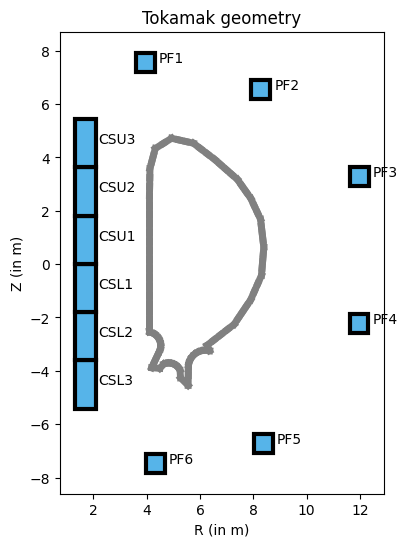

In [4]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS WITH QUADRILATERAL COILS
# COILS
coil1 = QuadrilateralCoil(name = 'PF1',
                          Itotal = 5.73e6,
                          Xcenter = np.array([3.9431,7.5741]),
                          Area = 0.5)
coil2 = QuadrilateralCoil(name = 'PF2',
                          Itotal= -2.88e6,
                          Xcenter = np.array([8.2851,6.5398]),
                          Area = 0.5)
coil3 = QuadrilateralCoil(name = 'PF3',
                          Itotal= -5.81e6,
                          Xcenter = np.array([11.9919,3.2752]),
                          Area = 0.5)
coil4 = QuadrilateralCoil(name = 'PF4',
                          Itotal= -4.78e6,
                          Xcenter = np.array([11.9630,-2.2336]),
                          Area = 0.5)
coil5 = QuadrilateralCoil(name = 'PF5',
                          Itotal= -7.81e6,
                          Xcenter = np.array([ 8.3908,-6.7269]),
                          Area = 0.5)
coil6 = QuadrilateralCoil(name = 'PF6',
                          Itotal= 16.94e6,
                          Xcenter = np.array([4.3340, -7.4665]),
                          Area = 0.5)
   
# QUADRILATERAL CROSS-SECTION SOLENOIDS
solewidth = 0.8
solenoid1 = QuadrilateralCoil(name = 'CSL3',
                              Itotal = 5.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -3.6067],
                                                    [1.696-solewidth/2, -3.6067]]))
solenoid2 = QuadrilateralCoil(name = 'CSL2',
                              Itotal = -10.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -1.7983],
                                                    [1.696-solewidth/2, -1.7983]]))
solenoid3 = QuadrilateralCoil(name = 'CSL1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, -1.798],
                                                    [1.696+solewidth/2, -1.798],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696-solewidth/2, 0.0]]))
solenoid4 = QuadrilateralCoil(name = 'CSU1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696-solewidth/2, 1.8183]]))
solenoid5 = QuadrilateralCoil(name = 'CSU2',
                              Itotal = -4.05e6,
                              Xvertices = np.array([[1.696-solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696-solewidth/2, 3.6267]]))
solenoid6 = QuadrilateralCoil(name = 'CSU3',
                              Itotal = -4.82e6,
                              Xvertices = np.array([[1.696-solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 5.435],
                                                    [1.696-solewidth/2, 5.435]]))

magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

# TOKAMAK WALL MESH
TOKmesh = Mesh('TRI03-FINE-ITFW')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh,
                              MAGNETS = magnets)

Equilibrium.TOKAMAK.Plot()

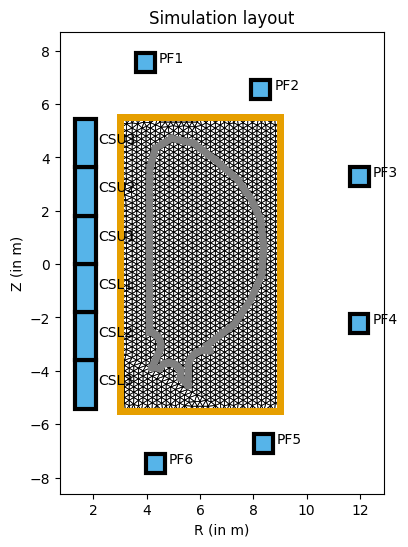

In [ ]:
Equilibrium.PlotLayout(plotmesh=False)

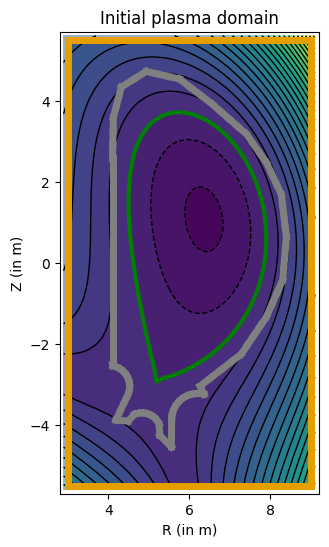

In [6]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

import numpy as np

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT  
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [7]:
Equilibrium.InitialiseDomainDiscretisation()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017818574514037656 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.20265348838508873 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·19.738125565344674
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 2884, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


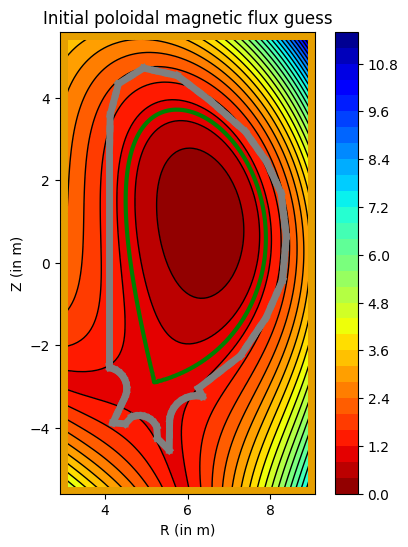

In [ ]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT  
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [9]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!


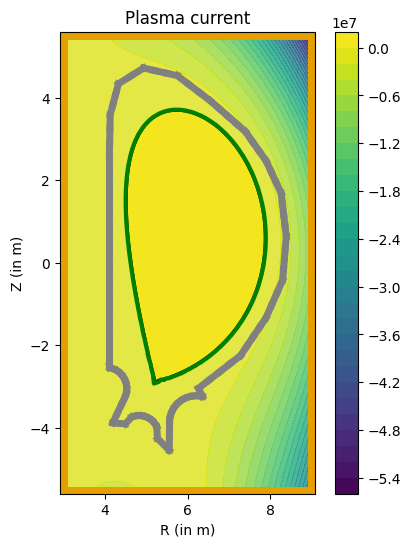

In [ ]:
### DEFINE PLASMA CURRENT MODEL

# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
     -> ASSIGN INITIAL VACUUM VESSEL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


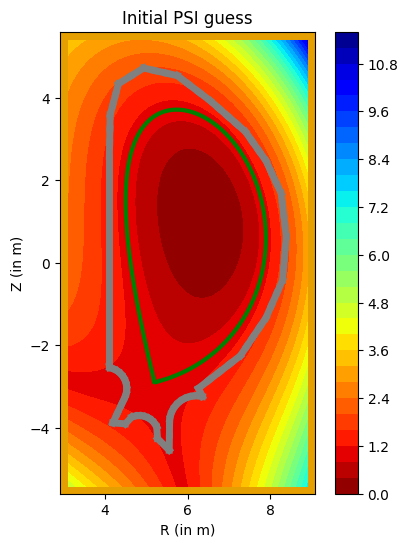

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999953
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.44875469 0.81013682]  (ELEMENT  876 ) WITH VALUE PSI_0 =  -11.200534920920644
SADDLE POINT AT  [ 5.08786528 -3.31735715]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.3373988416286995


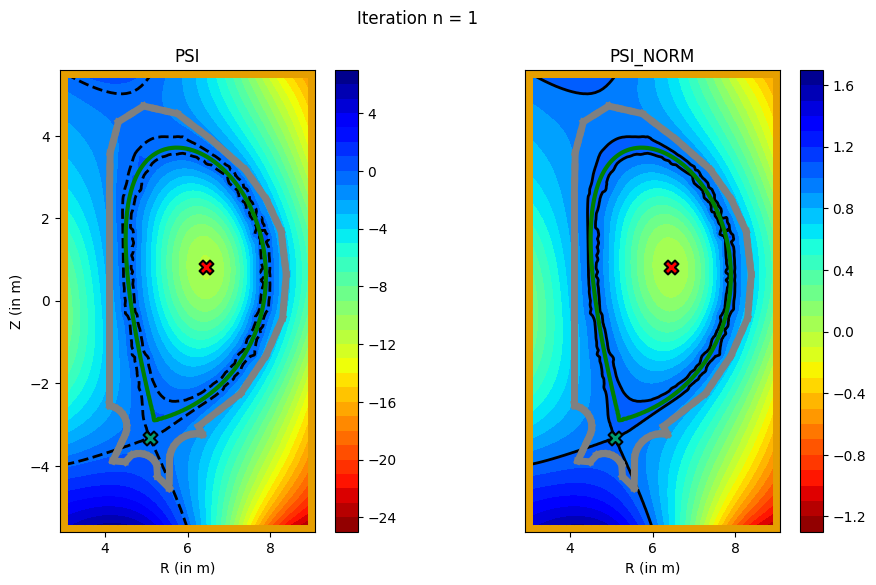

Internal iteration =  1 , PSI_NORM residu =  2.9499131761956185
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  15000000.000000156
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.48807758 0.72668924]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -14.421067664909145
SADDLE POINT AT  [ 5.07443578 -3.36063031]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017989822079243344


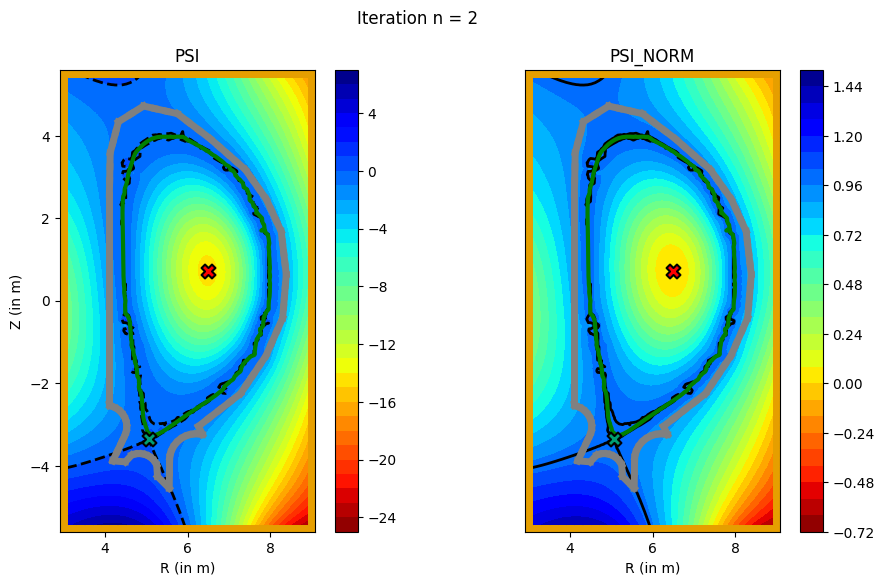

Internal iteration =  2 , PSI_NORM residu =  0.16597852003530117
 
Plasma region unchanged: distance between consecutive saddle points =  0.04530913638092645
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.000000011
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.50834796 0.68762037]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.233820387820153
SADDLE POINT AT  [ 5.07426573 -3.36035387]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017889052904447002


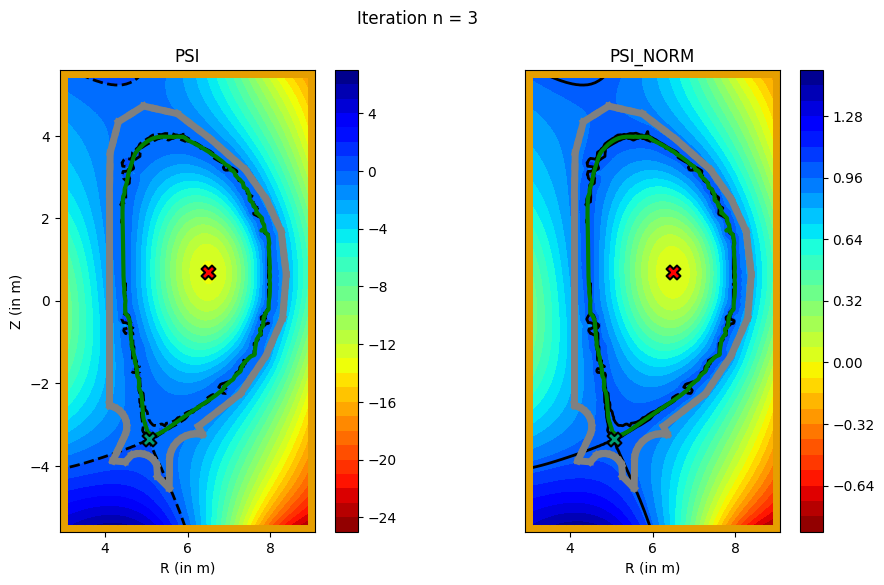

Internal iteration =  3 , PSI_NORM residu =  0.04740944833456414
 
Plasma region unchanged: distance between consecutive saddle points =  0.045096187422013885
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999931
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51506014 0.6686784 ]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.110344765270378
SADDLE POINT AT  [ 5.07425111 -3.36031214]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017874609230572172


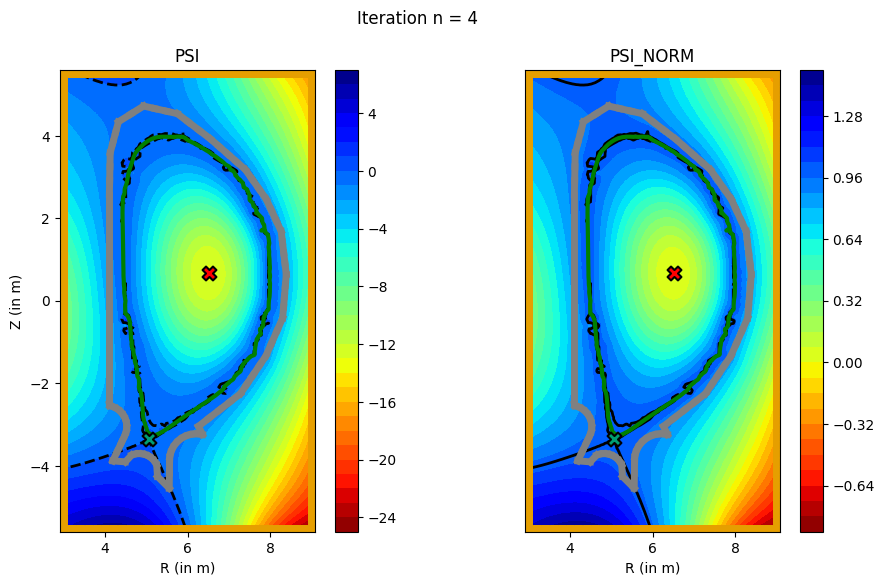

Internal iteration =  4 , PSI_NORM residu =  0.0060213902872607
 
Plasma region unchanged: distance between consecutive saddle points =  0.045060816117421736
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  14999999.999999817
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51701504 0.65950992]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.089586006760594
SADDLE POINT AT  [ 5.07424742 -3.36029618]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017869058256368017


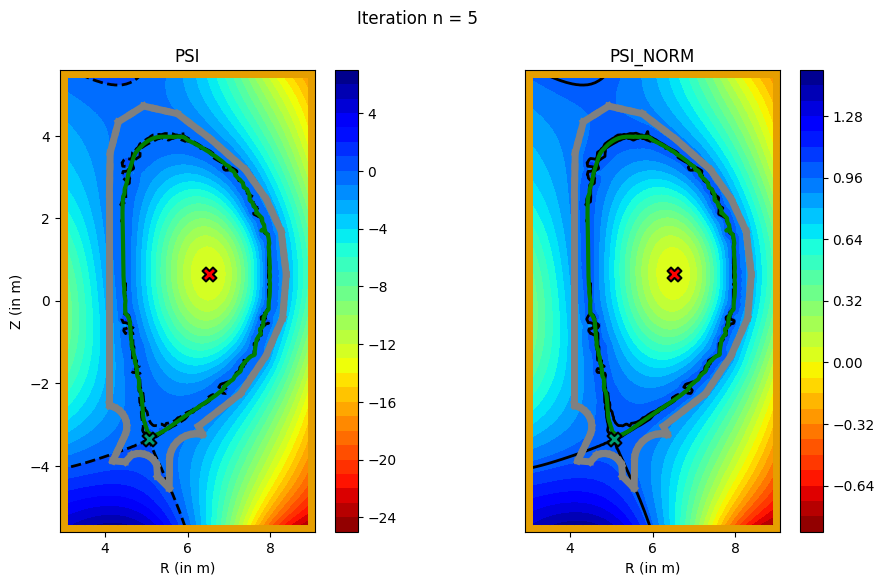

Internal iteration =  5 , PSI_NORM residu =  0.0015302197704276444
 
Plasma region unchanged: distance between consecutive saddle points =  0.04504670936254779
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.999999966
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51758496 0.65505474]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.085489217071945
SADDLE POINT AT  [ 5.07424592 -3.36028887]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017866515241616466


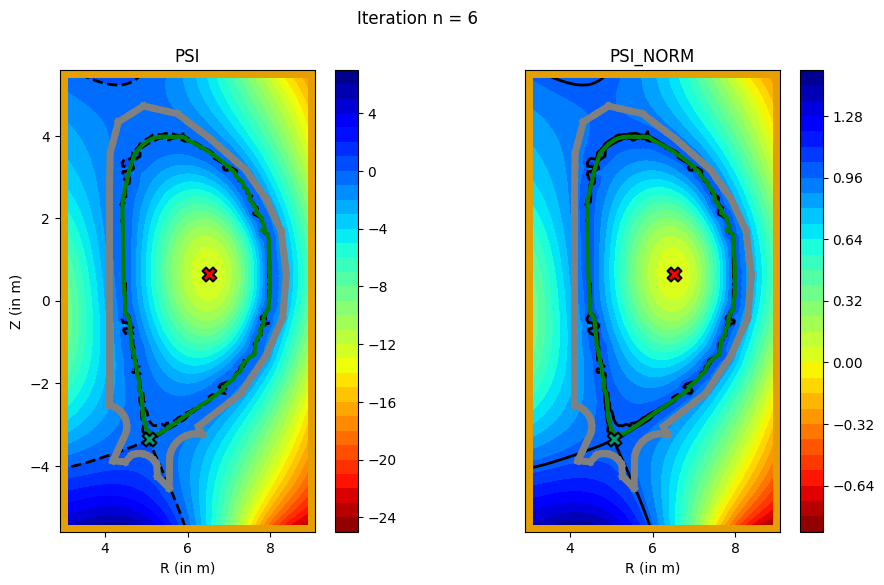

Internal iteration =  6 , PSI_NORM residu =  0.0006157420645965547
 
Plasma region unchanged: distance between consecutive saddle points =  0.04504019856482056
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.000000225
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51776125 0.65288046]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.084611920612602
SADDLE POINT AT  [ 5.07424521 -3.36028537]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017865299722015827


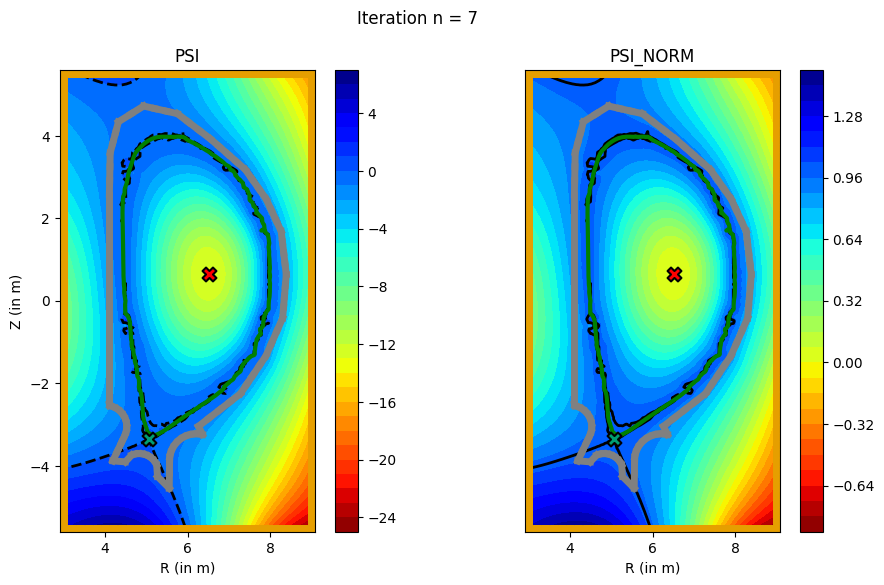

Internal iteration =  7 , PSI_NORM residu =  0.00028939235976424506
 
Plasma region unchanged: distance between consecutive saddle points =  0.04503708170918198
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  14999999.999999987
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.517821   0.65181687]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.084417537973788
SADDLE POINT AT  [ 5.07424487 -3.36028368]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017864710327422532


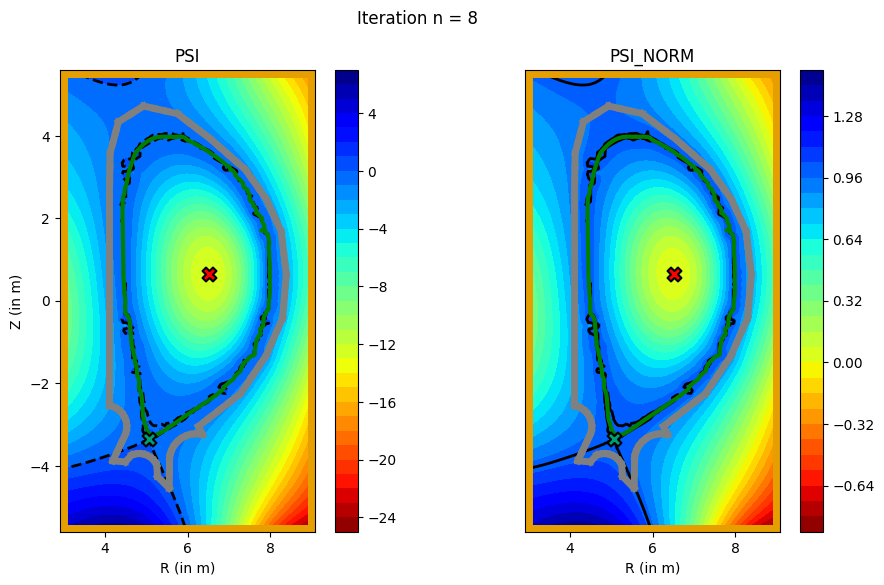

Internal iteration =  8 , PSI_NORM residu =  0.00014057811333069225
 
Plasma region unchanged: distance between consecutive saddle points =  0.045035570000429265
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.999999998
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51784347 0.65129601]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.084375013462342
SADDLE POINT AT  [ 5.07424471 -3.36028285]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.017864422864316404


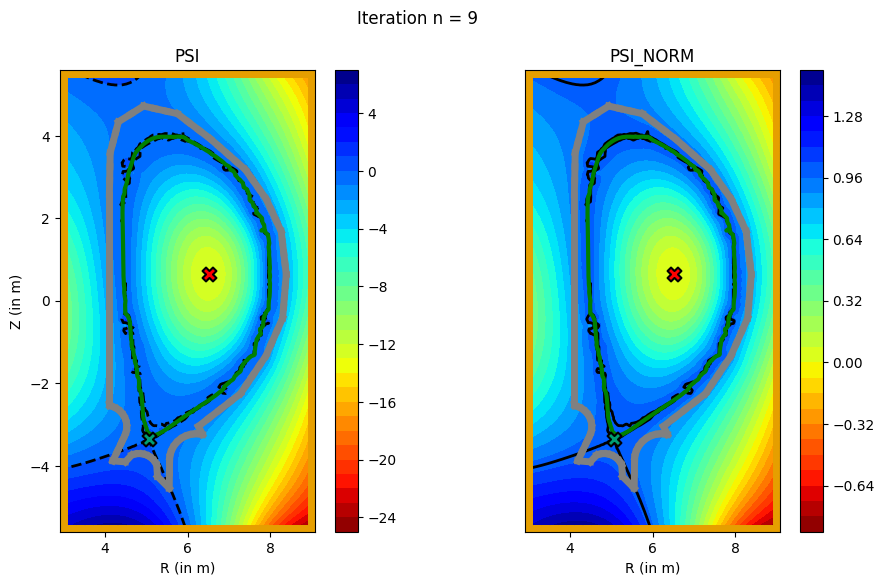

Internal iteration =  9 , PSI_NORM residu =  6.875258340270829e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.045034832721678755
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.041133496113088905
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  14999999.999999736
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51788901 0.65096694]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.084606240252185
SADDLE POINT AT  [ 5.1034288  -3.28632496]  (ELEMENT  2368 ) WITH VALUE PSI_X =  0.00011478734260198572


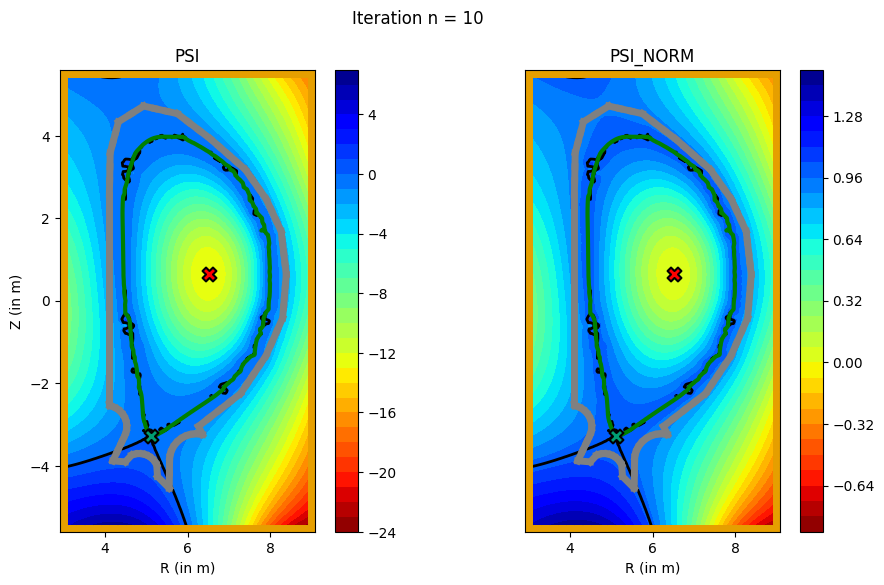

Internal iteration =  1 , PSI_NORM residu =  0.022601538476401943
 
Plasma region unchanged: distance between consecutive saddle points =  0.034716275998534885
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  14999999.999999996
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.5178857  0.65077755]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.062457513881064
SADDLE POINT AT  [ 5.10338253 -3.28627089]  (ELEMENT  2368 ) WITH VALUE PSI_X =  0.0001212116094655958


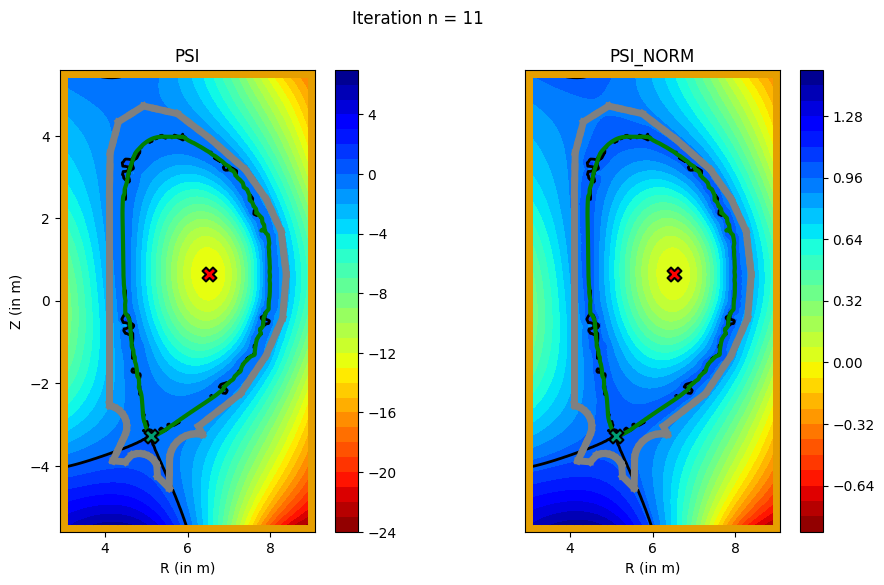

Internal iteration =  2 , PSI_NORM residu =  0.0009627955948500258
 
Plasma region unchanged: distance between consecutive saddle points =  0.03474392536112103
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Total current =  15000000.00000015
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51787191 0.65067653]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.059206729181097
SADDLE POINT AT  [ 5.10337928 -3.28626694]  (ELEMENT  2368 ) WITH VALUE PSI_X =  0.00012170883979558799


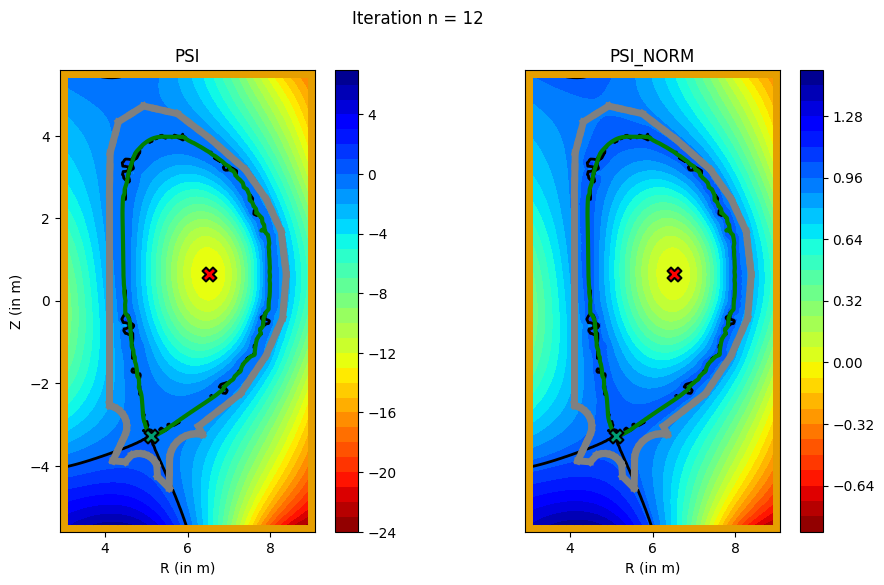

Internal iteration =  3 , PSI_NORM residu =  0.0001468268000791545
 
Plasma region unchanged: distance between consecutive saddle points =  0.034746014695923845
 
OUTER ITERATION = 2 , INNER ITERATION = 4
     Total current =  15000000.000000184
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
Done!
LOCAL EXTREMUM AT  [6.51786301 0.65062488]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.058333141183635
SADDLE POINT AT  [ 5.1033786  -3.28626598]  (ELEMENT  2368 ) WITH VALUE PSI_X =  0.00012182978533714466


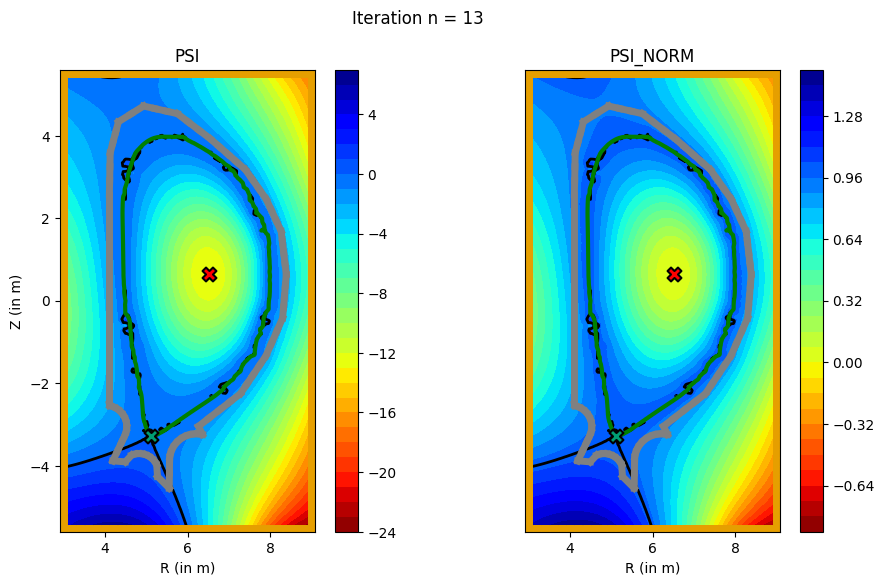

Internal iteration =  4 , PSI_NORM residu =  4.056550246490616e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.03474656921922735
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  0.00028556115684317277
 
SOLUTION CONVERGED


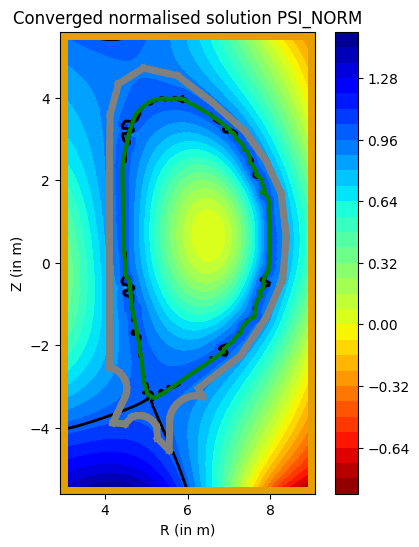

In [ ]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-ITER-SHAPEDCOILS"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)